# Dataset
https://huggingface.co/datasets/medalpaca/medical_meadow_cord19

# Install Required Libraries

In [ ]:
!pip install transformers datasets torch pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install "transformers[sentencepiece]" datasets sacrebleu rouge_score py7zr -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 251.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 14.4 MB/s eta 0:00:00


In [ ]:
!nvidia-smi


Tue Dec  3 04:27:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install datasets -q


In [ ]:
!pip install transformers[torch]


In [ ]:
!pip install accelerate -U

In [ ]:
!pip install accelerate -U


In [ ]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install evaluate -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.9 MB/s eta 0:00:00


# Import Libraries

In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import nltk
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
import torch

nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Pre-trained BERT Model and Tokenizer

In [ ]:
import evaluate

metric = evaluate.load("rouge")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"


model_ckpt = "patrickvonplaten/bert2bert_cnn_daily_mail"


tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model_bert = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

print("Model and tokenizer loaded successfully.")




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "transformers_version": "4.46.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Config of the decoder: <class 'transformers.models.bert.modeling_bert.BertLMHeadModel'> is overwritten by shared decoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "add_cross_attention"

Model and tokenizer loaded successfully.


# Define Helper Functions for Data Processing and Evaluation

In [ ]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

In [ ]:
def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="input",
                               column_summary="output"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score



# Load and Prepare the Dataset

Link: https://huggingface.co/datasets/medalpaca/medical_meadow_cord19

In [ ]:
from datasets import load_dataset


dataset_name = "medalpaca/medical_meadow_cord19"

data= load_dataset(dataset_name,split='train')
num_samples = 500
dataset_samsum = data.select(range(num_samples)).train_test_split( test_size=0.2)


print(f"Features: {dataset_samsum['train'].column_names}")

README.md:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

medical_meadow_cord19.json:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/821007 [00:00<?, ? examples/s]

Features: ['output', 'input', 'instruction']


# Evaluate the Pre-trained Model on the Test Set

In [ ]:
import evaluate
rouge_metric = evaluate.load('rouge')


In [ ]:

def calculate_metric_on_test_ds(test_dataset, metric, model, tokenizer, column_text, column_summary, batch_size=8):
    predictions = []
    references = []

    for i in range(0, len(test_dataset), batch_size):
        batch = test_dataset[i:i+batch_size]

        # Tokenize inputs
        inputs = tokenizer(batch[column_text], return_tensors="pt", padding=True, truncation=True).to(model.device)

        # Generate predictions
        outputs = model.generate(inputs.input_ids)
        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)

        # Save predictions and references
        predictions.extend(decoded_preds)
        references.extend(batch[column_summary])

    # Compute the metric
    results = metric.compute(predictions=predictions, references=references)
    return results


score = calculate_metric_on_test_ds(
    dataset_samsum['test'],
    rouge_metric,
    model_bert,
    tokenizer,
    column_text='input',
    column_summary='output',
    batch_size=8
)

print("ROUGE Score:", score)



ROUGE Score: {'rouge1': 0.22699780004412717, 'rouge2': 0.08960775787688771, 'rougeL': 0.16403992303675763, 'rougeLsum': 0.16449705329721803}


In [ ]:

rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]


rouge_dict = dict((rn, score[rn]) for rn in rouge_names)


rouge_df = pd.DataFrame(rouge_dict, index=['bert'])


print(rouge_df)



        rouge1    rouge2   rougeL  rougeLsum
bert  0.226998  0.089608  0.16404   0.164497


# Inspect a Sample Input from the Test Set










In [ ]:
dataset_samsum['test'][1]['input']

'Supply Chains have been more and more suffering from unexpected industrial, natural events, or epidemics that might disrupt the normal flow of materials, information, and money. The recent pandemic triggered by the outbreak of the new COVID-19 has pointed out the increasing vulnerability of supply chain networks, prompting companies (and governments) to implement specific policies and actions to control and reduce the spread of the disease across the network, and to cope with exogenous shocks. In this paper, we present a stochastic Susceptible-Infected-Susceptible (SIS) framework to model the spread of new epidemics across different distribution networks and determine social distancing/treatment policies in the case of local and global networks. We highlight the relevance of adaptability and flexibility of decisions in unstable and unpredictable scenarios. © 2021, IFIP International Federation for Information Processing.'

# Generate and Print a Summary Using the Pipeline

In [ ]:
pipe = pipeline('summarization', model=model_bert, tokenizer=tokenizer) # Use the loaded model instance (model_bert) and the tokenizer

pipe_out = pipe(dataset_samsum['test'][1]['input'])

print(pipe_out)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': 'supply chains have been more and more suffering from unexpected industrial, natural events, or epidemics that might disrupt the normal flow of materials, information, and money. in this paper, we present a stochastic susceptible - infected - - susceptible - - - framework to model the spread of new epidemics across different distribution networks. we highlight the relevance of adaptability and flexibility of decisions in unstable and unpredictable situations.'}]


In [ ]:
print(pipe_out[0]['summary_text'].replace(" .", ".\n"))


supply chains have been more and more suffering from unexpected industrial, natural events, or epidemics that might disrupt the normal flow of materials, information, and money. in this paper, we present a stochastic susceptible - infected - - susceptible - - - framework to model the spread of new epidemics across different distribution networks. we highlight the relevance of adaptability and flexibility of decisions in unstable and unpredictable situations.


In [ ]:
!pip install rouge_score -q


# Visualize Token Length Distributions



Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors


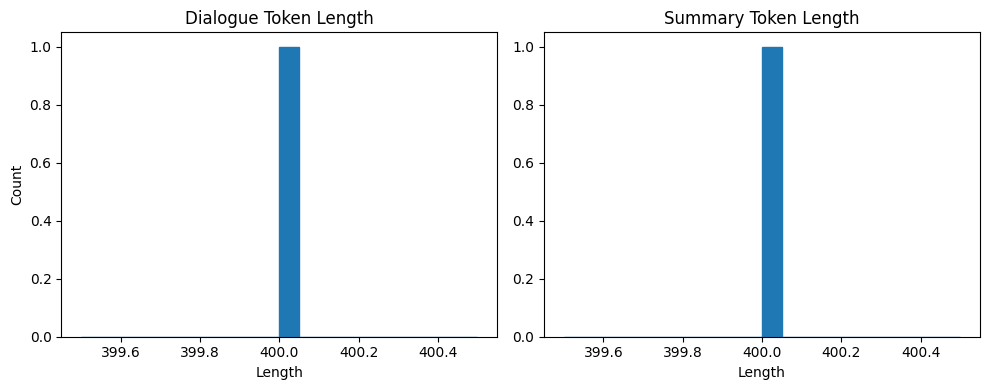

In [ ]:
dialogue_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['input']])

summary_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['output']])


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

# Prepare the Dataset for Training

In [ ]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(
        example_batch['input'],
        max_length=512,
        truncation=True
    )

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(
            example_batch['output'],
            max_length=128,
            truncation=True
        )

    return {
        'input_ids': input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched=True)


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

# Set Up Data Collator for Sequence-to-Sequence Tasks

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model_bert,
    padding=True


# Configure the trainer for Model Training

In [ ]:
from transformers import TrainingArguments, Trainer

trainer_args = TrainingArguments(
    output_dir='bert-samsum',
    num_train_epochs=3,
    warmup_steps=300,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    logging_steps=50,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    gradient_accumulation_steps=8,
    save_total_limit=2,
    load_best_model_at_end=True,
    greater_is_better=True,
    learning_rate=5e-5,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# Initialize the Trainer and Train the Model

In [ ]:
!pip install accelerate -U
from transformers import TrainingArguments, Trainer


trainer = Trainer(
    model=model_bert,
    args=trainer_args,
    tokenizer=tokenizer,
    data_collator=seq2seq_data_collator,
    train_dataset=dataset_samsum_pt["train"],
    eval_dataset=dataset_samsum_pt["test"]
)

trainer.train()

<ipython-input-28-87b3eec3aec6>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:649: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Epoch,Training Loss,Validation Loss
1,No log,3.712969
2,3.919100,3.143280
3,3.919100,2.804608


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:649: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/pyt

TrainOutput(global_step=75, training_loss=3.609084167480469, metrics={'train_runtime': 276.248, 'train_samples_per_second': 4.344, 'train_steps_per_second': 0.271, 'total_flos': 529439644375200.0, 'train_loss': 3.609084167480469, 'epoch': 3.0})

# Re-evaluate the Fine-tuned Model on the Test Set

In [ ]:
score = calculate_metric_on_test_ds(
    dataset_samsum['test'], rouge_metric, trainer.model, tokenizer, batch_size = 2, column_text = 'input', column_summary= 'output'
)


In [ ]:
# Create a dictionary with ROUGE scores
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)

# Convert to a DataFrame
rouge_df = pd.DataFrame(rouge_dict, index=[f'bert'])

# Display the DataFrame
print(rouge_df)


        rouge1    rouge2   rougeL  rougeLsum
bert  0.219643  0.085449  0.15842   0.159239


# Save the Fine-tuned Model and Tokenizer

In [ ]:
tokenizer.save_pretrained("tokenizer")


('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

# TEST



In [ ]:
sample_text = dataset_samsum["test"][0]["input"]

reference = dataset_samsum["test"][0]["output"]

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128}

pipe = pipeline("summarization", model="patrickvonplaten/bert2bert_cnn_daily_mail",tokenizer=tokenizer)


Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "transformers_version": "4.46.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Config of the decoder: <class 'transformers.models.bert.modeling_bert.BertLMHeadModel'> is overwritten by shared decoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "add_cross_attention"

# Generate and Compare a Sample Summary

In [ ]:
print("Dialogue:")
print(sample_text)


print("\nReference Summary:")
print(reference)


print("\nModel Summary:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])


Dialogue:
Conspiracy theories have seen a rise in popularity in recent years. Spreading quickly through social media, their disruptive effect can lead to a biased public view on policy decisions and events. We present a novel approach for LDA-pre-processing called Iterative Filtering to study such phenomena based on Twitter data. In combination with Hashtag Pooling as an additional pre-processing step, we are able to achieve a coherent framing of the discussion and topics of interest, despite of the inherent noisiness and sparseness of Twitter data. Our novel approach enables researchers to gain detailed insights into discourses of interest on Twitter, allowing them to identify tweets iteratively that are related to an investigated topic of interest. As an application, we study the dynamics of conspiracy-related topics on US Twitter during the last four months of 2020, which were dominated by the US-Presidential Elections and Covid-19. We monitor the public discourse in the USA with ge